---
CSC 268 Lab 9:  Morphological Operations
---

This lab will give you a chance to explore some morphological operations in Python.  The same basic functionality is provided by both Scikit-Image and OpenCV.  The demo will use Scikit's version, but you can experiment with the other as well.  We'll begin with a small test image containing two circles and some random noise.

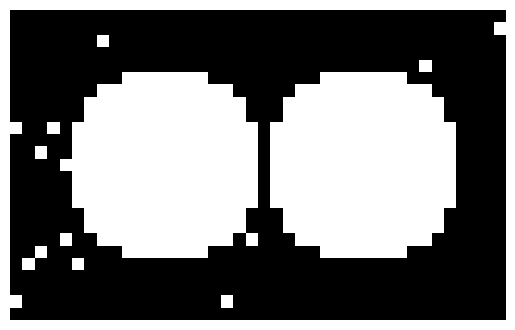

In [101]:
import cv2 as cv
import numpy as np
from skimage.draw import disk as draw_disk
from skimage.morphology import (erosion, dilation, closing, opening, skeletonize, disk)
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='gray')

def imshow(img,cmap=None):
    plt.imshow(img,cmap=cmap,interpolation='none')
    plt.axis('off')
    plt.show()
    
circles = np.zeros((25, 40))
circles[draw_disk((12, 12), 8)] = 1
circles[draw_disk((12, 28), 8)] = 1
for x in range(20):
   circles[np.random.randint(25), np.random.randint(40)] = 1
imshow(circles);

We also need a structuring element to specify the nieghborhood for our operations.  For now we'll use the simplest structuring element, a 4-neighbor cross.

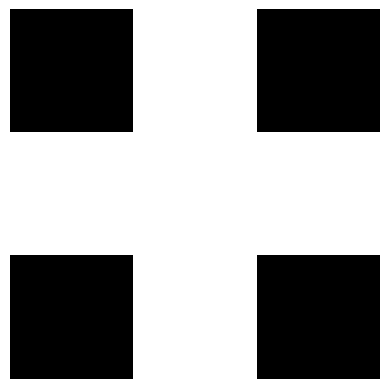

In [4]:
element = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]])
imshow(element)

Let's try applying each of the basic operations to our test image in turn.  Before running, try to imagine what will happen.  THen look carefully at the results.  Are they as you predicted?

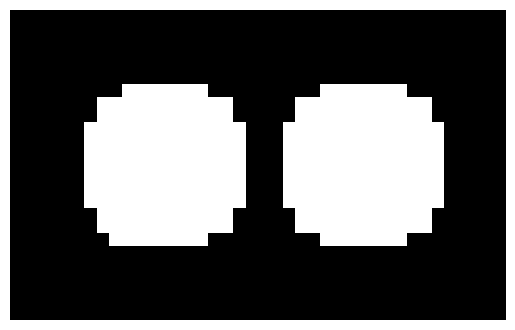

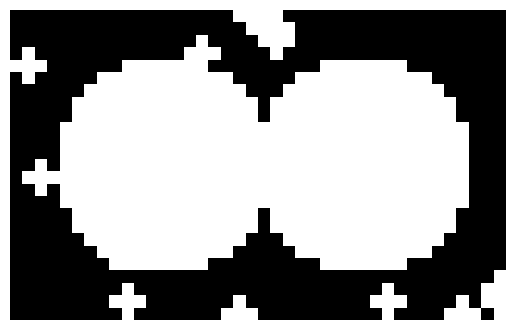

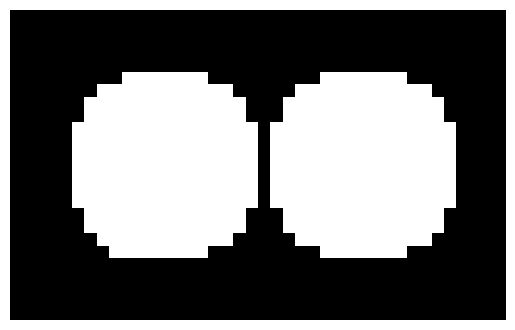

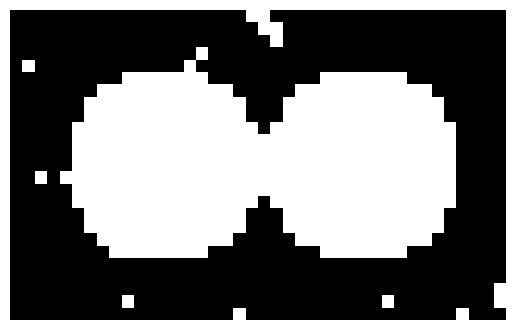

In [22]:
imshow(erosion(circles, element))
imshow(dilation(circles, element))
imshow(opening(circles, element))
imshow(closing(circles, element))

We can apply different operations in combination to achieve different desired effects.  In this case, we can identify all the boundary pixels in the image by eroding once and subtracting the result from our original image.

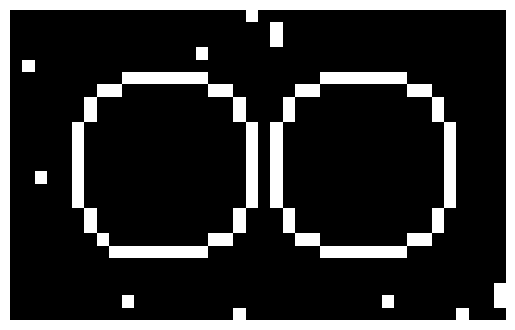

In [24]:
imshow(circles-erosion(circles,element))

It would be nice not to have the noisy pixels in the background.  See if you can make a modified version of the above code that erases the single pixel noise, but still shows the boundary pixels on the circles.

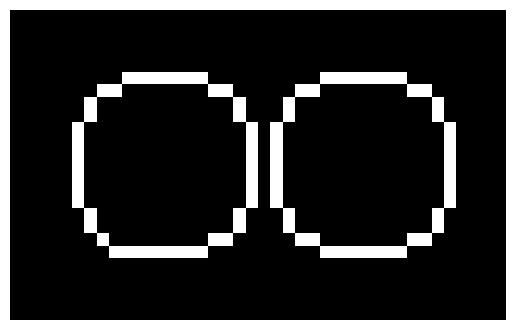

In [27]:
# TODO: Use morphological operations to generate the two hollow rings without the background pixels.

imshow(opening(circles,element)-erosion(circles,element))

We don't have to limit ourselves to such small and simple structuring elements.  Here we experiment a bit with a much larger image (2000x2000).  Larger structuring elements will be useful; we'll use disks of different radii.  With the right choices, we can eliminate background specks and fill holes in the main shape.

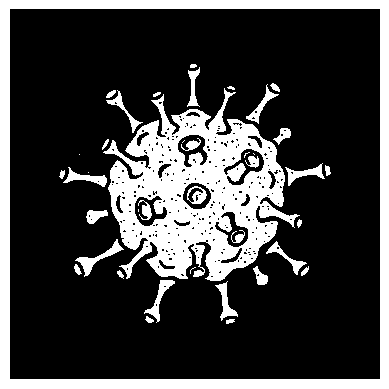

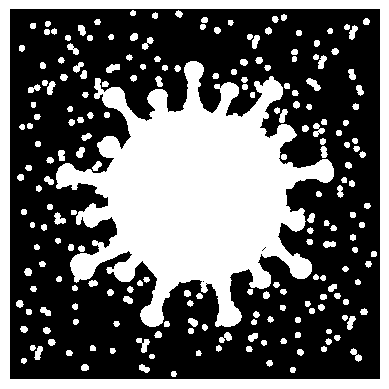

In [12]:
virus = cv.imread('virus.png',0).astype(np.float32)/255.0
imshow(virus)
vb = virus < 0.9
imshow(vb)

imshow(erosion(vb, disk(6)))
imshow(dilation(vb, disk(15)))

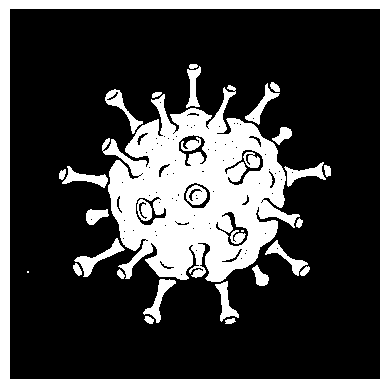

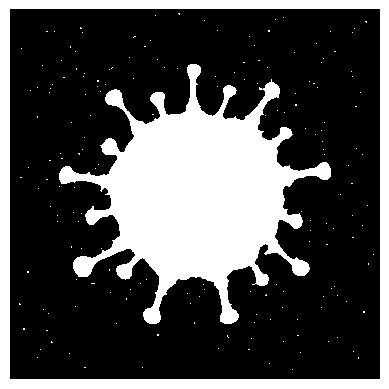

In [14]:
imshow(opening(vb,disk(6)))
imshow(closing(vb,disk(15)))

In order to both eliminate the background specks and achieve a single filled shape, we will need both an opening and a closing.  Note that order matters; if we do the same thing backwards the results don't look so great.

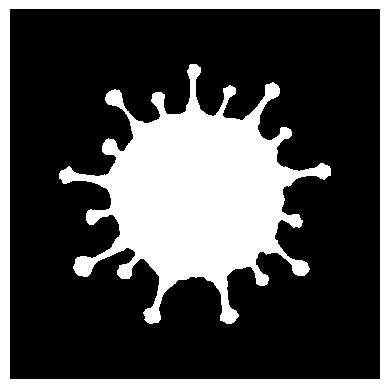

In [17]:
imshow(closing(opening(vb,disk(6)),disk(20)))

As practice, see if you can apply all the tricks we just learned to clean up this image of the Smith College log.  You'll need to choose an appropriate threshold, then apply several different operations to get the best result.

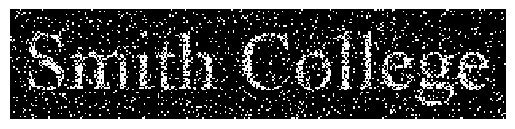

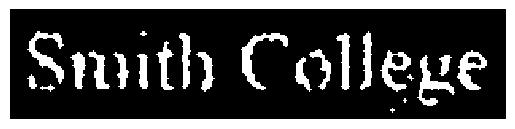

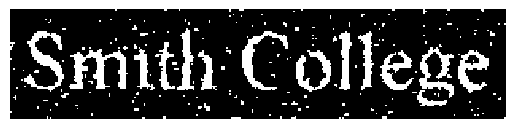

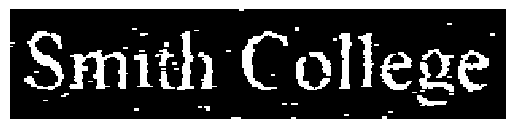

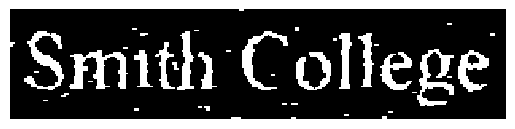

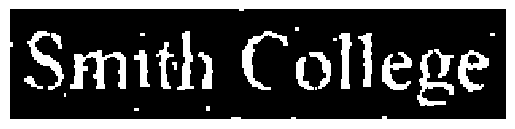

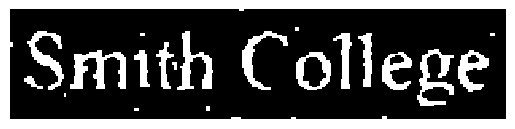

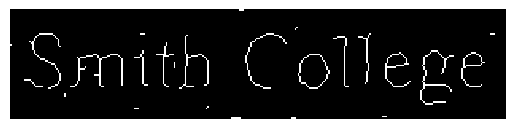

In [102]:
# TODO: CLean up the image below so that the letters look just like new (or as close as possible).

sc = cv.imread('smith-noise.png',0).astype(np.float32)/255.0
#imshow(sc)

# simple approach:
sct = (sc > 0.75)  # asymmetric threshold helps cut noise
imshow(sct)
imshow(closing(opening(closing(sct,disk(1)),disk(1)),np.ones((3,3))))  # we start with small operations and apply bigger ones at the end.

# more complex approach:
scbt = cv.medianBlur(sc,3)>0.4  # median blur reduces outliers
imshow(scbt)
imshow(opening(scbt,np.ones((1,3))))  # remove some noise
imshow(closing(opening(scbt,np.ones((1,3))),np.ones((3,1))))  # join up broken letters
imshow(opening(closing(opening(scbt,np.ones((1,3))),np.ones((3,1))),np.ones((2,1))))  # remove more noise
imshow(closing(opening(closing(opening(scbt,np.ones((1,3))),np.ones((3,1))),np.ones((2,1))),np.array([[0,0,1,1],[1,1,0,0]])))  # join up more letters
# we could also compute connected components and filter out all those with very few pixels.

sc2 = closing(opening(closing(opening(scbt,np.ones((1,3))),np.ones((3,1))),np.ones((2,1))),np.array([[0,0,1,1],[1,1,0,0]]))
imshow(skeletonize(sc2))

### Sources

Portions of this lab are based upon J. Manansala's [Medium article](https://medium.com/swlh/image-processing-with-python-morphological-operations-26b7006c0359#:~:text=But%20first%2C%20what%20are%20morphological,based%20on%20its%20neighbors'%20value.)

Virus image from [Freepik](https://www.freepik.com/premium-vector/silhouette-coronavirus-cell-vector-illustration-virus-cause-respiratory-infection-covid19_17378938.htm)